In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import QuantileTransformer,StandardScaler,FunctionTransformer,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Load the Tested dataset
df = pd.read_csv('C:/Users/ranja/OneDrive/Desktop/DATASET/tested.csv')

In [2]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#REMOVING USELESS DATA

uselessData = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace = True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [9]:
#Imputing missing values

missing_values = df.isna().sum()
percentages = (missing_values / len(df)) * 100
result_df = pd.DataFrame({
    'no of missing values': missing_values.values,
    'percentage': percentages.round(2)  # Round percentages to two digits
}, index=df.columns)
result_df

,no of missing values,percentage
Survived,0,0.00
Pclass,0,0.00
Sex,0,0.00
Age,86,20.57
SibSp,0,0.00
Parch,0,0.00
Fare,1,0.24
Embarked,0,0.00


In [10]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


In [11]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [12]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [13]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


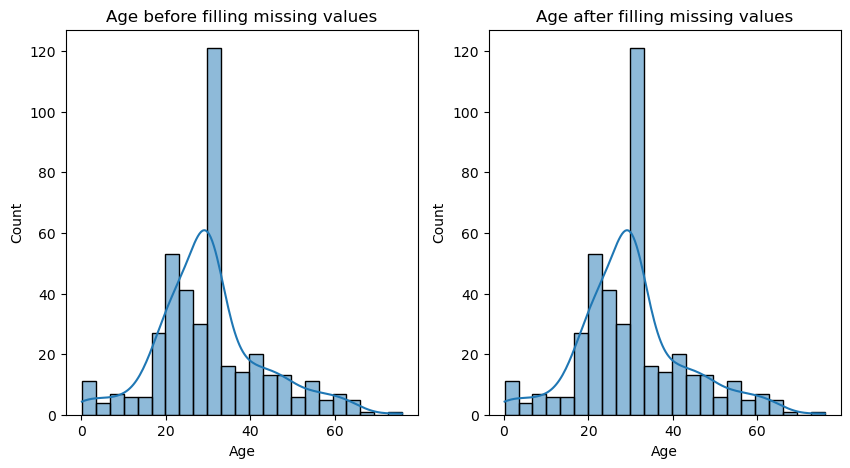

In [14]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Age'],ax=ax[0],kde=True)
sns.histplot(df['Age'].fillna(df['Age'].mean()),ax=ax[1],kde=True)
ax[0].set_title('Age before filling missing values')
ax[1].set_title('Age after filling missing values')
plt.show()

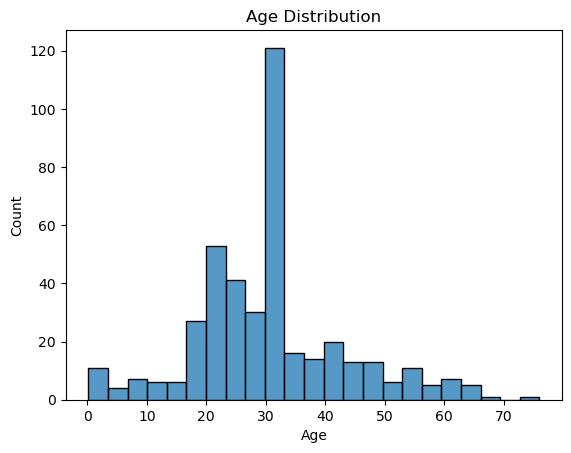

In [15]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

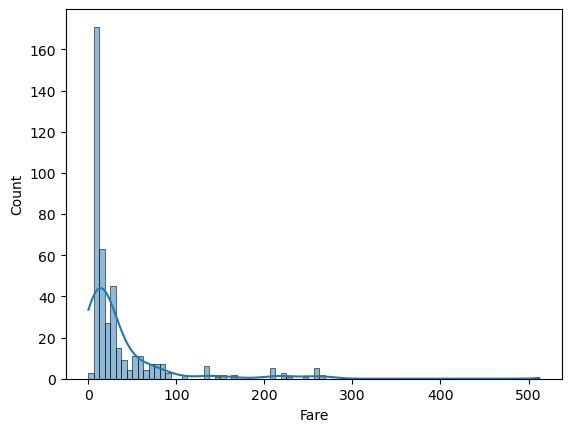

In [16]:
sns.histplot(data=df,x='Fare',kde=True)
plt.show()

<Axes: >

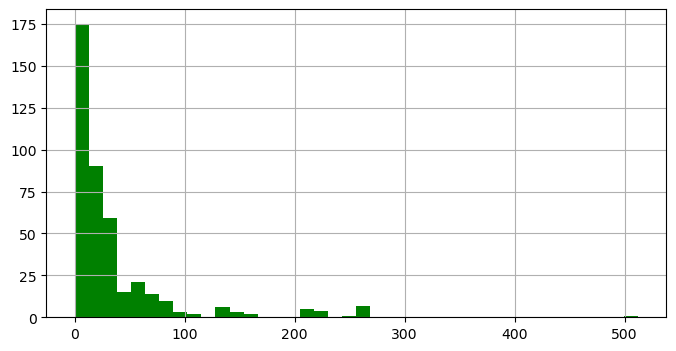

In [17]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='SibSp', ylabel='count'>

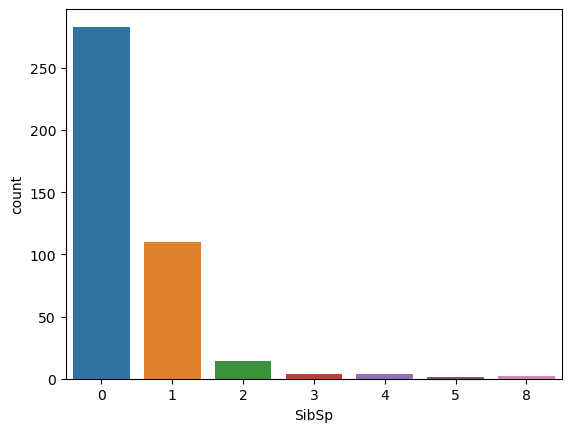

In [18]:
sns.countplot(x='SibSp',data=df)

In [19]:
df["Sex"] = df["Sex"].map({'female':1, 'male':0}).astype(int)
df["Sex"].head(5)

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int32

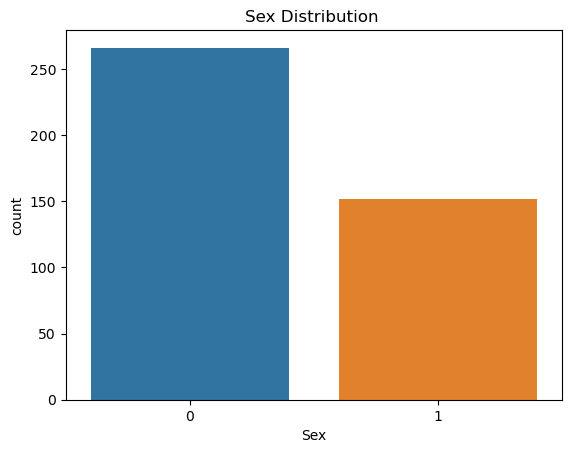

In [20]:
sns.countplot(x='Sex',data=df)
plt.title('Sex Distribution ')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

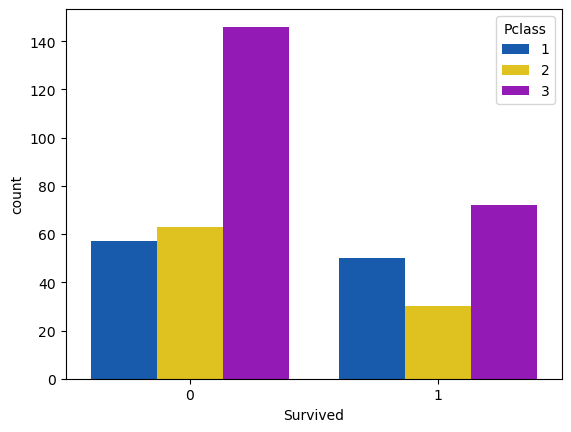

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='prism')

In [22]:
#With Median of Age of Different Group Based On Survival and Sex

male_survived_age_median = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1), 'Age'].median()
male_death_age_median = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0), 'Age'].median()
female_survived_age_median = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1), 'Age'].median()
female_death_age_median = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0), 'Age'].median()

df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1), 'Age'] = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1), 'Age'].fillna(male_survived_age_median)

df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0), 'Age'] = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 0), 'Age'].fillna(male_death_age_median)

df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1), 'Age'] = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1), 'Age'].fillna(female_survived_age_median)

df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0), 'Age'] = df.loc[(df['Sex'] == 'female') & (df['Survived'] == 0), 'Age'].fillna(female_death_age_median)

In [23]:
df[(df["Sex"] == 1) & (df["Survived"]==1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,3,1,47.00000,1,0,7.0000,S
4,1,3,1,22.00000,1,1,12.2875,S
6,1,3,1,30.00000,0,0,7.6292,Q
8,1,3,1,18.00000,0,0,7.2292,C
12,1,1,1,23.00000,1,0,82.2667,S
...,...,...,...,...,...,...,...,...
409,1,3,1,3.00000,1,1,13.7750,S
410,1,3,1,30.27259,0,0,7.7500,Q
411,1,1,1,37.00000,1,0,90.0000,Q
412,1,3,1,28.00000,0,0,7.7750,S


In [24]:
def survival_percentage(data, column_name):
    unique_values = data[column_name].unique()
    
    percentages = {}
    
    for value in unique_values:
        subset = data[data[column_name] == value]
        survived_count = subset["Survived"].sum()
        total_count = len(subset)
        if total_count > 0:
            percentage = (survived_count / total_count) * 100
            percentages[value] = percentage
    
    return percentages
sex_result = survival_percentage(df, "Sex")

for key, value in sex_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

precentage of 0 who survived: 0.00%
precentage of 1 who survived: 100.00%


In [25]:
#Target and inputs
target=df.Survived

inputs=df[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,0,34.50000,7.8292
1,3,1,47.00000,7.0000
2,2,0,62.00000,9.6875
3,3,0,27.00000,8.6625
4,3,1,22.00000,12.2875
...,...,...,...,...
413,3,0,30.27259,8.0500
414,1,1,39.00000,108.9000
415,3,0,38.50000,7.2500
416,3,0,30.27259,8.0500


<Axes: xlabel='Pclass', ylabel='Age'>

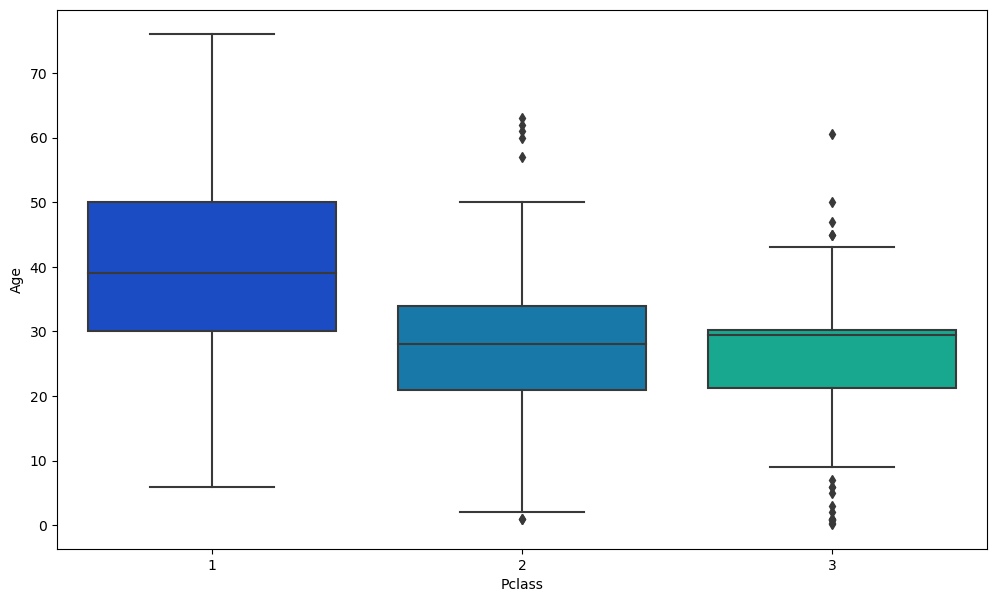

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

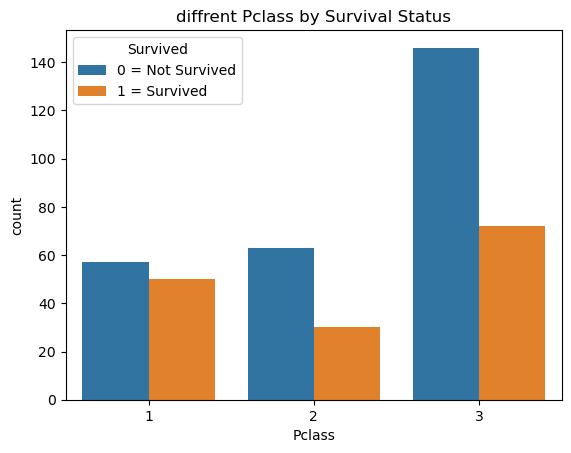

In [27]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title='Survived', labels=[f"{key} = {value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

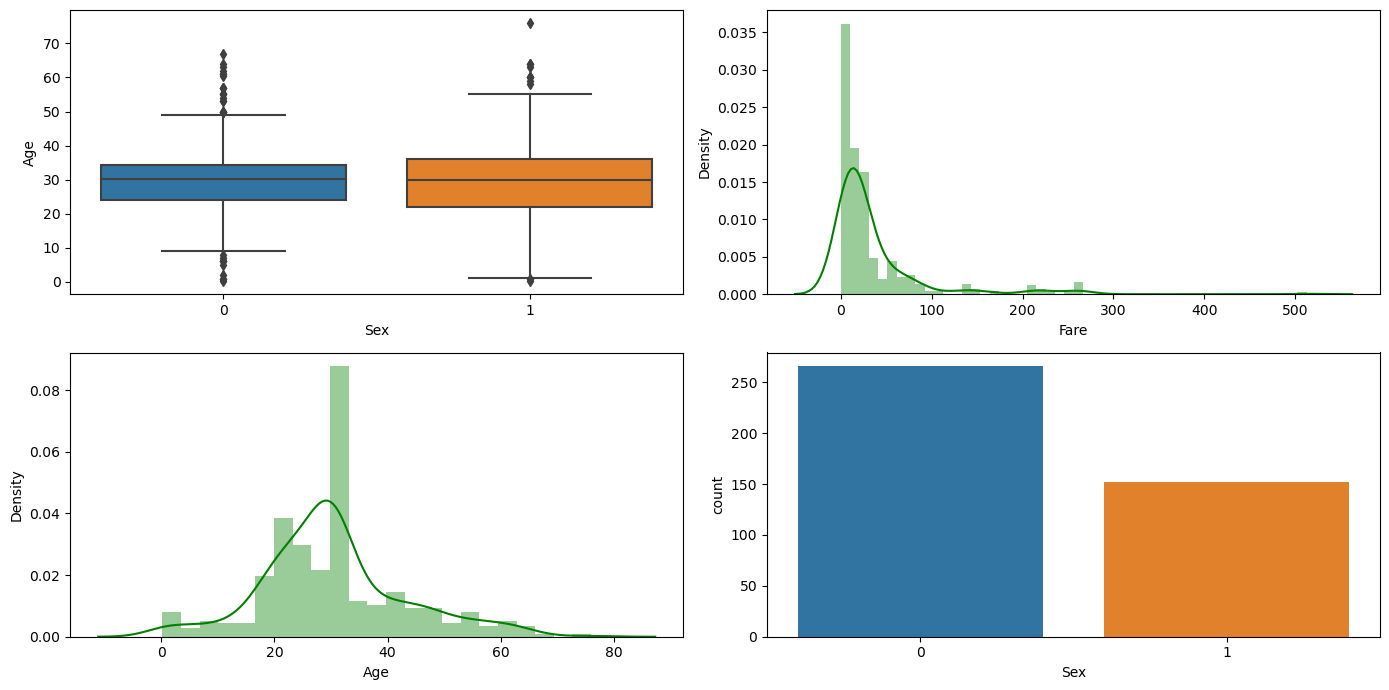

In [28]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age',data= df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

In [29]:
Embarkeds = df.Embarked.unique()
for Embarked in Embarkeds:
    print("Embarked:", Embarked)

Embarked: Q
Embarked: S
Embarked: C


In [30]:
df['Embarked'] = df["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
df["Embarked"].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Embarked, dtype: int32

<Axes: xlabel='Embarked', ylabel='count'>

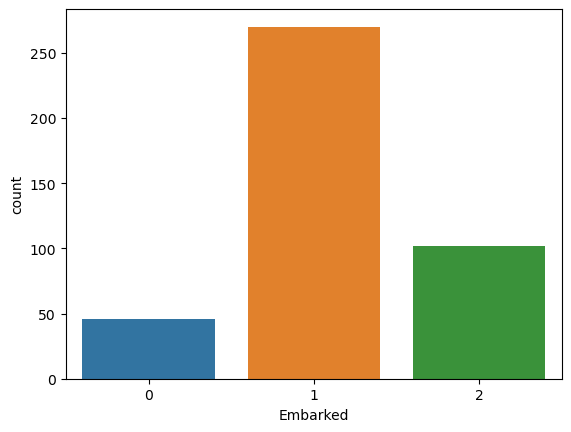

In [31]:
sns.countplot(x=df['Embarked'])

In [32]:
embarked_result = survival_percentage(df, "Embarked")

for key, value in embarked_result.items():
    print(f"precentage of {key} who survived: {value:.2f}%")

precentage of 0 who survived: 52.17%
precentage of 1 who survived: 32.59%
precentage of 2 who survived: 39.22%


In [33]:
#Feature Selection

corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         1.000000
Fare        0.191382
Parch       0.159120
SibSp       0.099943
Age        -0.000011
Embarked   -0.037432
Pclass     -0.108615
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

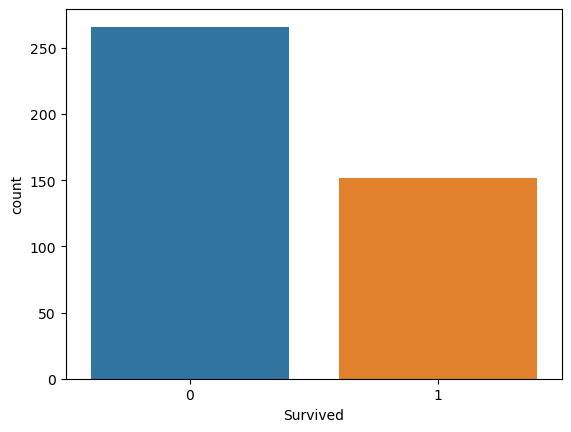

In [34]:
sns.countplot(x=df['Survived'])

In [35]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
columnsle=['Sex', 'Embarked']
for i in columnsle:
    df[i] = le.fit_transform(df[i])

In [36]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,int64,0,0.000000,3,418,0.000000,2.000000,1.133971


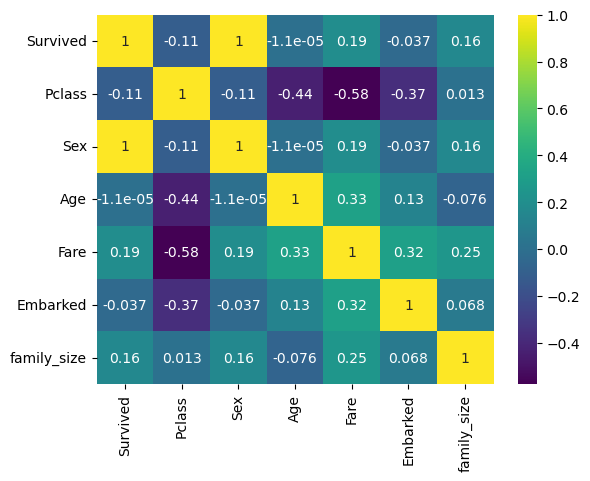

In [37]:
#The family_size column is correlated with survived so we will keep it and drop other two

df['family_size'] = df['SibSp'] + df['Parch'] 
df.drop(['SibSp','Parch'],axis=1,inplace=True)

corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df,cmap='viridis',annot=True)
plt.show()

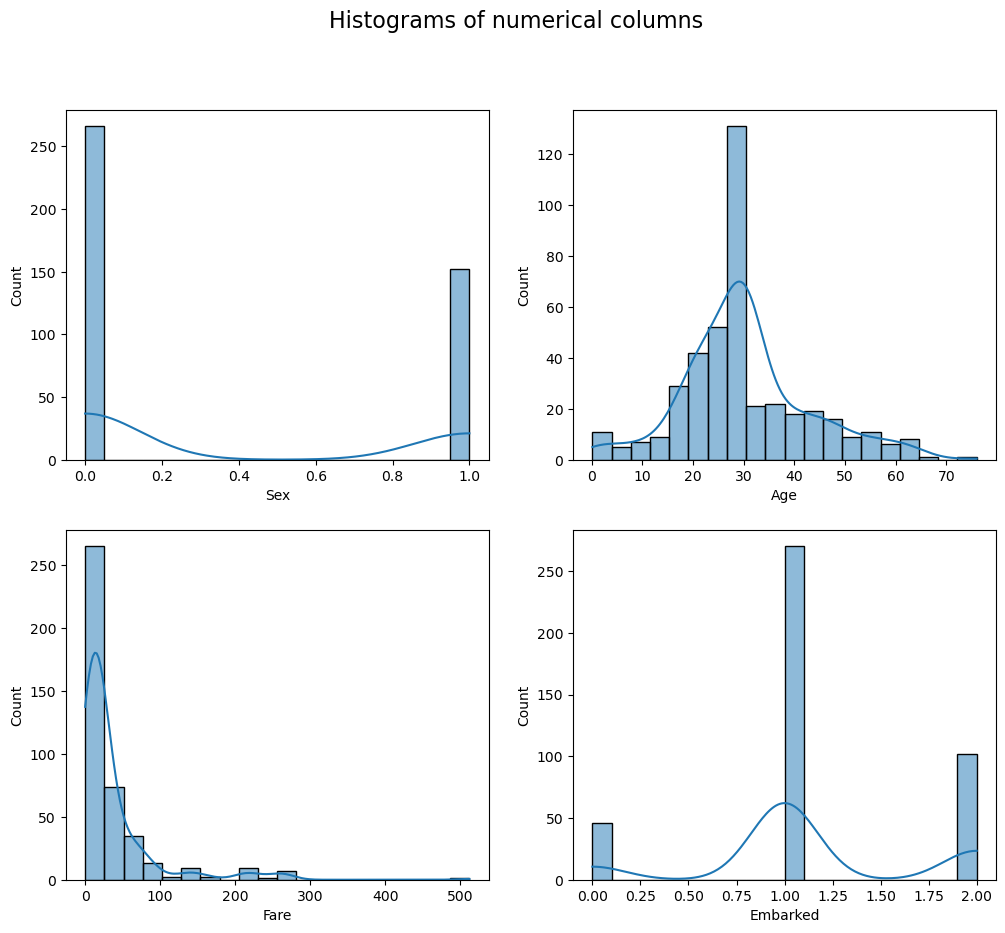

In [38]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.histplot(data=df,x=num_columns[0],kde=True,bins=20,ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

In [39]:
cat_columns=list(df.select_dtypes(include=['object']).columns)
num=int(len(cat_columns)/2) if int(len(cat_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.countplot(data=df,x=cat_columns[0],ax=ax[j][i],hue='Survived')
            cat_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

<Figure size 1200x1000 with 0 Axes>

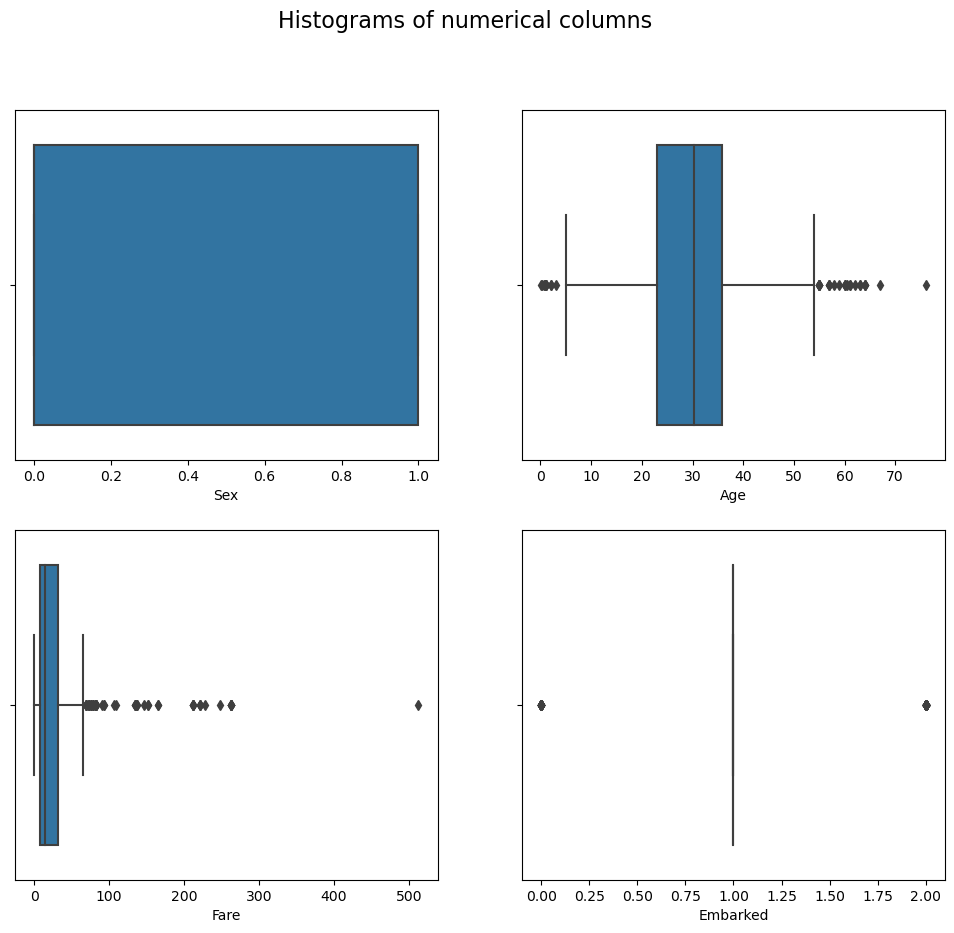

In [40]:
num_columns=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_columns)/2) if int(len(num_columns)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.boxplot(data=df,x=num_columns[0],ax=ax[j][i])
            num_columns.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

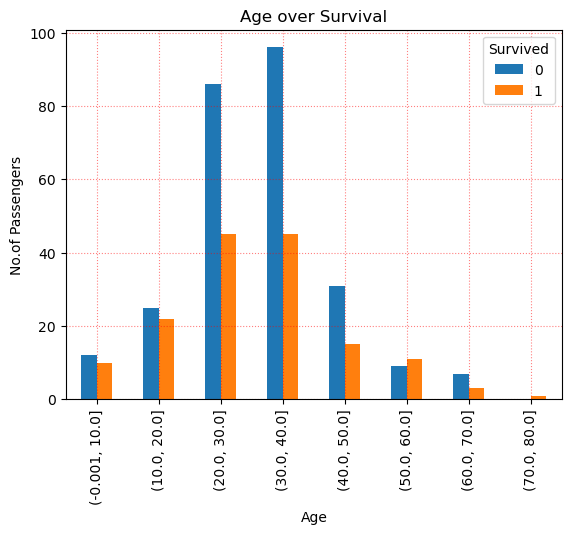

In [41]:
age_groups = pd.cut(df['Age'], bins=range(0, 100, 10), include_lowest=True)
pd.crosstab(age_groups,df.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Age over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

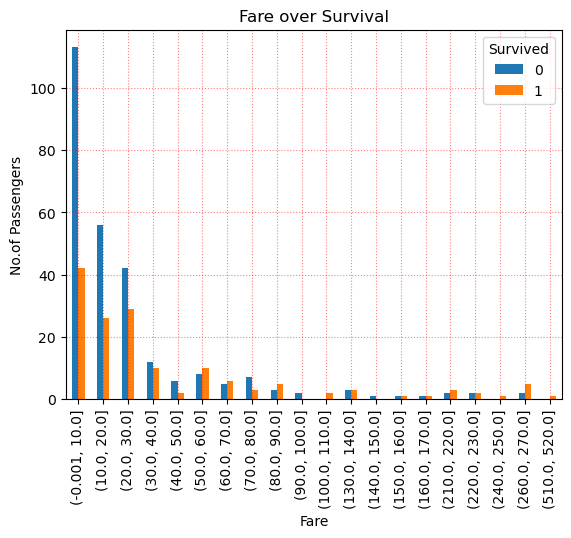

In [42]:
fare_groups = pd.cut(df['Fare'], bins=range(0, 550, 10), include_lowest=True)
pd.crosstab(fare_groups,df.Survived).plot(kind='bar')
plt.ylabel('No.of Passengers')
plt.title('Fare over Survival')
plt.grid(color="red", linestyle=":", alpha=0.5)

[]

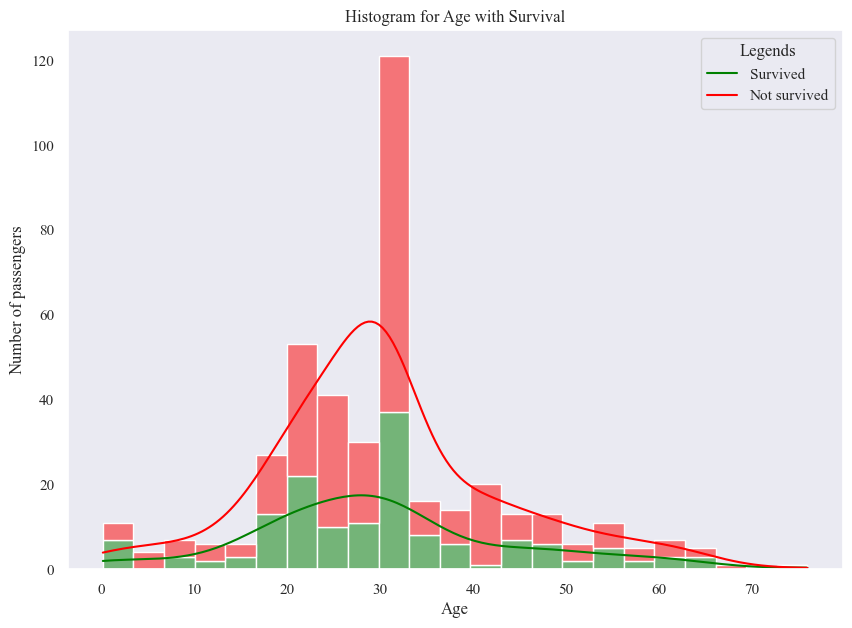

In [43]:
import seaborn as sb
import matplotlib.pyplot as mpl
sb.set(style = "dark", font = "Times New Roman")
_, ax = mpl.subplots(figsize = (10, 7))
sb.histplot(data = df, x = "Age", hue = "Survived", multiple = "stack", kde = True, palette=["red", "green"], ax = ax)
ax.set_title("Histogram for Age with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
mpl.plot()

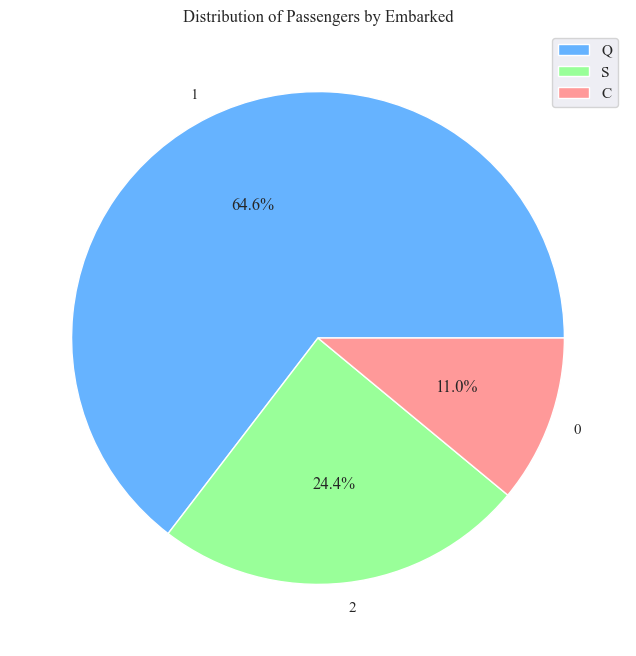

In [44]:
embarked_counts = df['Embarked'].value_counts()
mpl.figure(figsize=(8, 8))
mpl.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999'])
mpl.title("Distribution of Passengers by Embarked")
mpl.legend(["Q", "S", "C"])
mpl.show()

[]

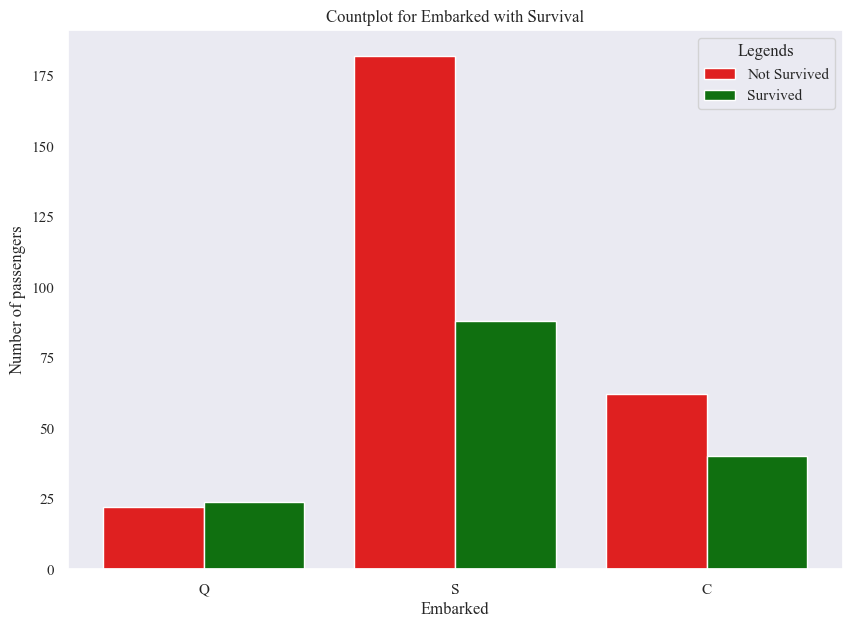

In [45]:
#Some of the passengers survived while maximum passengers dies
_, ax = mpl.subplots(figsize = (10, 7))
sb.countplot(data = df, x = "Embarked", hue = "Survived", palette=["red", "green"], ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
mpl.plot()

[]

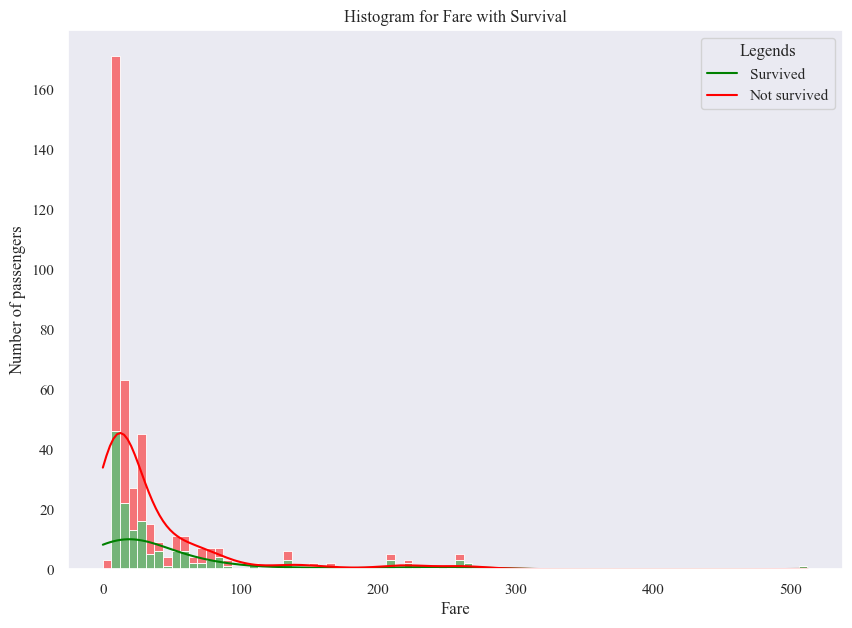

In [46]:
#Some of the passengers survived while maximum passengers dies can be seen from this fare data

_, ax = mpl.subplots(figsize = (10, 7))
sb.histplot(data = df, x = "Fare", hue = "Survived", multiple = "stack", kde = True, palette = ["red", "green"], ax = ax)
ax.set_title("Histogram for Fare with Survival")
ax.set_xlabel("Fare")
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Survived", "Not survived"])
mpl.plot()

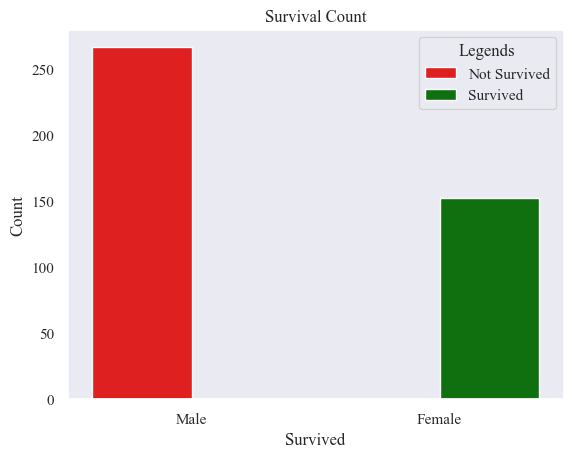

In [47]:
#All female survived while all male dies can be seen from this data

ax = sb.countplot(data = df, x="Survived", hue = "Survived", palette = ["red", "green"])
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("Survival Count")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
mpl.xticks([0,1],["Male", "Female"])
mpl.show()

In [48]:
#Predicting survival through LabelEncoder

obj=LabelEncoder()
inputs['Sex']=obj.fit_transform(inputs['Sex'])
inputs.head(4)

,Pclass,Sex,Age,Fare
0,3,0,34.5,7.8292
1,3,1,47.0,7.0000
2,2,0,62.0,9.6875
3,3,0,27.0,8.6625


In [49]:
from sklearn.model_selection import train_test_split

Input = df.drop(['Survived'], axis=1)
Output = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)
Input = df.drop(['Survived'], axis=1)
Output = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [50]:
#Predicting Survival through Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as score

LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [51]:
#Accuracy

PredictedValue = LR.predict(x_test)
print("Accuracy = {:0.2f}%".format(score(PredictedValue, y_test)*100))

Accuracy = 100.00%


In [52]:
df5 = pd.DataFrame({'Actual ': y_test , 'Predicted': PredictedValue})

df5

,Actual,Predicted
358,3,3
164,2,2
17,3,3
67,1,1
4,3,3
...,...,...
327,1,1
407,1,1
325,3,3
81,1,1


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, PredictedValue)
print(cm)

[[16  0  0]
 [ 0 23  0]
 [ 0  0 45]]


In [54]:
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error, r2_score
loss = log_loss(y_test, LR.predict_proba(x_test))
mse = mean_squared_error(y_test, PredictedValue)
mae = mean_absolute_error(y_test, PredictedValue)
r2 = r2_score(y_test, PredictedValue)

accuracy = accuracy_score(y_test, PredictedValue)

print(f'Log Loss: {loss:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

Log Loss: 0.07
MSE: 0.00
MAE: 0.00
R2 Score: 1.00


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,PredictedValue))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [56]:
# Applying model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [58]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [59]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [60]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
pdtreetr = dtree.predict(x_train)
pdtreete = dtree.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

padatr = ada.predict(x_train)
padate = ada.predict(x_test)

pknntr = knn.predict(x_train)
pknnte = knn.predict(x_test)

In [62]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

print(acc_report(y_train, pdtreetr))
print(acc_report(y_test, pdtreete))

the accuracy of tha model is  1.0
[[ 91   0   0]
 [  0  70   0]
 [  0   0 173]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       173

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

None
the accuracy of tha model is  1.0
[[16  0  0]
 [ 0 23  0]
 [ 0  0 45]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

None


In [63]:
print(acc_report(y_train, prftr))
print(acc_report(y_test, prfte))

the accuracy of tha model is  1.0
[[ 91   0   0]
 [  0  70   0]
 [  0   0 173]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00       173

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

None
the accuracy of tha model is  1.0
[[16  0  0]
 [ 0 23  0]
 [ 0  0 45]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

None


In [64]:
print(acc_report(y_train, pknntr))
print(acc_report(y_test, pknnte))

the accuracy of tha model is  0.8892215568862275
[[ 88   1   2]
 [ 12  49   9]
 [  3  10 160]]
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        91
           2       0.82      0.70      0.75        70
           3       0.94      0.92      0.93       173

    accuracy                           0.89       334
   macro avg       0.87      0.86      0.86       334
weighted avg       0.89      0.89      0.89       334

None
the accuracy of tha model is  0.8452380952380952
[[16  0  0]
 [ 3 16  4]
 [ 1  5 39]]
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        16
           2       0.76      0.70      0.73        23
           3       0.91      0.87      0.89        45

    accuracy                           0.85        84
   macro avg       0.82      0.85      0.83        84
weighted avg       0.85      0.85      0.84        84

None


In [65]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
models = {
    'Support Vector Machine': SVC(),
    'Neural Network': MLPClassifier(max_iter=1000) 
}

In [66]:
from sklearn.svm import SVC
svm = SVC( C = 0.001, kernel = 'linear', random_state = 42)
svm.fit(x_train, y_train)
print(f'Model score on training set : {(svm.score(x_train,y_train)*100).round(2)}%')
print(f'Model score on test set : {(svm.score(x_test,y_test)*100).round(2)}%')

Model score on training set : 74.55%
Model score on test set : 66.67%


In [67]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, PredictedValue)
    report = classification_report(y_test, PredictedValue)  # Compute classification report
    print(f"{model_name} - Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Support Vector Machine - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Neural Network - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        45

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84




In [68]:
#Model Building

df = pd.get_dummies(df,drop_first=True,dtype='int')
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,0,34.5,7.8292,0,0
1,1,3,1,47.0,7.0000,1,1
2,0,2,0,62.0,9.6875,0,0
3,0,3,0,27.0,8.6625,1,0
4,1,3,1,22.0,12.2875,1,2
